# Create Visualizations

## Load Libraries and Data

In [248]:
# Import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the independent vs simultaneous data into python objects
# Each CSV is a different run of the simulation, these will be averaged to create final visualizations
ivs1 = pd.read_csv('FILE NAME HERE')  # CSV Data file required (or a different read method)
ivs2 = pd.read_csv('FILE NAME HERE')
ivs3 = pd.read_csv('FILE NAME HERE') 

# Turn off unwanted axes
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [249]:
# Load the python objects into lists to make visualization easier
# There is an extra data point added at (0,0), so we pop this off
ivs_dat1 = ivs1.values.tolist()
ivs_dat1[0].pop(0)
ivs_dat1[1].pop(0)

ivs_dat2 = ivs2.values.tolist()
ivs_dat2[0].pop(0)
ivs_dat2[1].pop(0)

ivs_dat3 = ivs3.values.tolist()
ivs_dat3[0].pop(0)
ivs_dat3[1].pop(0)

1.0

## Create Needed Lists

In [250]:
# Now find the average between the three loaded in simulations
x = np.arange(len(ivs_dat1[0]))
rows, cols = (2, len(ivs_dat1[0])) # Assign values for the number of rows and the number of columns
ivs_meanList = [[0 for i in range(cols)] for j in range(rows)] # Create the mean list object

# Fill the mean list object
for n in x:
    ivs_meanList[0][n] = (ivs_dat1[0][n]+ivs_dat2[0][n]+ivs_dat3[0][n])/3
    ivs_meanList[1][n] = (ivs_dat1[1][n]+ivs_dat2[1][n]+ivs_dat3[1][n])/3

## Load the Second Set of Data

In [251]:
# Load the response 1, response 2, and simultaneous data into python objects
res1 = pd.read_csv('FILE NAME HERE') 
res2 = pd.read_csv('FILE NAME HERE') 
res3 = pd.read_csv('FILE NAME HERE') 

# Load the objects into lists to make plotting easier
# Again there is an extra point at (0,0), so we pop this off
res_dat1 = res1.values.tolist()
res_dat1[0].pop(0)
res_dat1[1].pop(0)
res_dat1[2].pop(0)

res_dat2 = res2.values.tolist()
res_dat2[0].pop(0)
res_dat2[1].pop(0)
res_dat2[2].pop(0)

res_dat3 = res3.values.tolist()
res_dat3[0].pop(0)
res_dat3[1].pop(0)
res_dat3[2].pop(0)
x = np.arange(len(res_dat1[0]))

# Create the mean list between the three simulations for the response plot
rows, cols = (3, len(res_dat1[0])) # Grab the number of rows and number of columns
res_meanList = [[0 for i in range(cols)] for j in range(rows)] 

# Create the itd object and load the data into it
itd_in = np.zeros(len(x))
for n in x:
        itd_in[n] = -200+n*4    

for n in x:
    res_meanList[0][n] = (res_dat1[0][n]+res_dat2[0][n]+res_dat3[0][n])/3
    res_meanList[1][n] = (res_dat1[1][n]+res_dat2[1][n]+res_dat3[1][n])/3
    res_meanList[2][n] = (res_dat1[2][n]+res_dat2[2][n]+res_dat3[2][n])/3


## Create the ITD Curve Visualization

Text(0, 0.5, 'Membrane Potential (mV)')

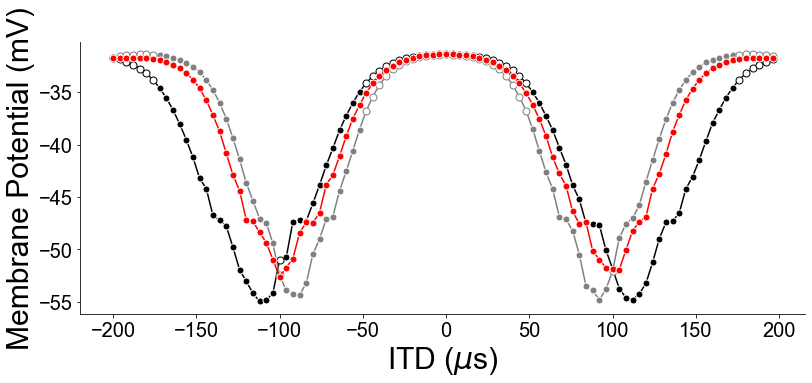

In [252]:
# Create an object to hold the indices where response one and two are near each other
index = []
# Find said indices
for n in x:
    if(np.abs(res_meanList[0][n]-res_meanList[1][n])<3):
        index.append(n)

# Create list objects to hold the portion of res1 and res 2 near each other as well as the ITD
res1_sublist = [res_meanList[0][i] for i in range(len(res_meanList[0])) if i in index]
res2_sublist = [res_meanList[1][i] for i in range(len(res_meanList[1])) if i in index]
itd_sublist = [itd_in[i] for i in range(len(itd_in)) if i in index]
simult = res_meanList[2]

# Create the response1 vs response2 vs simultaneous graph
plt.figure(figsize = (13,5))
plt.xticks(fontsize = 20,fontname = "Arial")
plt.yticks(fontsize = 20,fontname = "Arial")
plt.plot(itd_in, res_meanList[0],'ko-',mec='w',ms=7)
plt.plot(itd_in,res_meanList[1],'o-',color = 'grey',mec='w',ms=7)
plt.plot(itd_sublist,res1_sublist,'o',color = 'white',mec='k',ms=7)
plt.plot(itd_sublist,res2_sublist,'o',color = 'white',mec='grey',ms=7)
plt.plot(itd_in,simult,'o-',color='r',mec='w',ms=7)

plt.xlabel('ITD ($\mu$s)',fontsize = 30, fontname = "Arial")
plt.ylabel('Membrane Potential (mV)',fontsize = 30, fontname= "Arial")
plt.legend(["Response1","Response2","Res1 within 3mV","Res2 within 3mV","Simultaneous"],bbox_to_anchor=(.75, .9),
           bbox_transform=plt.gcf().transFigure,fontsize = 15)

## Create the Independent vs Simultaneous Visualization

In [253]:
# Find the independent and simultaneous values where response1 vs response2 are near each other
ind_sublist = [ivs_meanList[0][i] for i in range(len(ivs_meanList[0])) if i in index]
simult_sublist = [ivs_meanList[1][i] for i in range(len(ivs_meanList[1])) if i in index]

Text(0, 0.5, '$V_{stack}$(mV)')

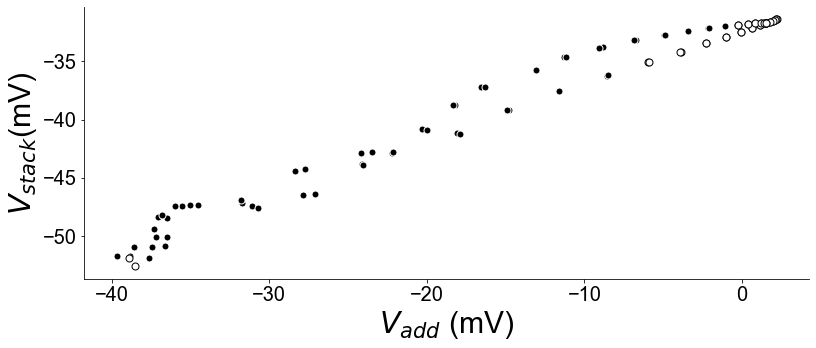

In [254]:
# Create the independent vs simultaneous visualization
plt.figure(figsize = (13,5))
plt.xticks(fontsize = 20, fontname = "Arial")
plt.yticks(fontsize = 20,fontname = "Arial")
plt.plot(ivs_meanList[0],ivs_meanList[1],'ko',mec='w',ms=7)
plt.plot(ind_sublist,simult_sublist,'o',color = 'white',mec='k',ms=7)

plt.xlabel('$V_{add}$ (mV)',fontsize = 30, fontname = "Arial")
plt.ylabel('$V_{stack}$(mV)',fontsize = 30, fontname = "Arial")
plt.legend(["Response1-Response2 > 3mV","Response1-Response2 $\leq$ 3mV"],fontsize = 15)